In [2]:
from msc_thesis.datasets import get_toy_dataset
from msc_thesis.convolution import build_noncentral_filter_weights, get_smoothed_dataset
from msc_thesis.nmf_algorithm import runNMF
from msc_thesis.estimators import get_mse_and_mprime_vs_alpha, get_mse_and_mprime_vs_binningfactor
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Generate the dataset

In [3]:
# 'No war' datatset parameters
L = 200             # N. of energy channels
n_poisson = 300     # Average poisson number per pixel (this number will be splitted on the L dimension)
C = 15              # 
P1, P2 = 100,100    # Spatial dimensions
P = P1*P2           # Number of pixels
seed = 2            # Use seed 2 to obtain same results as in report

# Generate synthetic 'no war' dataset
G, Wtilde, Dtilde, Htilde_vol, Htilde, Ytilde, Y_vol, Y, K = get_toy_dataset(L, C, n_poisson, seed)


## Run NMF using different binning factors

It 10 / 100: loss 0.003,  23.415 it/s
It 20 / 100: loss 0.003,  24.622 it/s
exits because of relative change < tol: 9.869724561762439e-05
Stopped after 22 iterations in 0.0 minutes and 1.0 seconds.
;....................................
It 10 / 100: loss 0.001,  73.792 it/s
It 20 / 100: loss 0.001,  78.391 it/s
It 30 / 100: loss 0.001,  81.434 it/s
It 40 / 100: loss 0.001,  83.164 it/s
It 50 / 100: loss 0.001,  84.428 it/s
exits because of relative change < tol: 0.0001188760788501626
Stopped after 51 iterations in 0.0 minutes and 1.0 seconds.
;....................................
It 10 / 100: loss 0.000,  223.100 it/s
It 20 / 100: loss 0.000,  229.893 it/s
It 30 / 100: loss 0.000,  231.029 it/s
It 40 / 100: loss 0.000,  232.767 it/s
It 50 / 100: loss 0.000,  233.618 it/s
It 60 / 100: loss 0.000,  232.240 it/s
It 70 / 100: loss 0.000,  233.452 it/s
exits because of relative change < tol: 0.00017069252731782874
Stopped after 79 iterations in 0.0 minutes and 0.0 seconds.
;.................

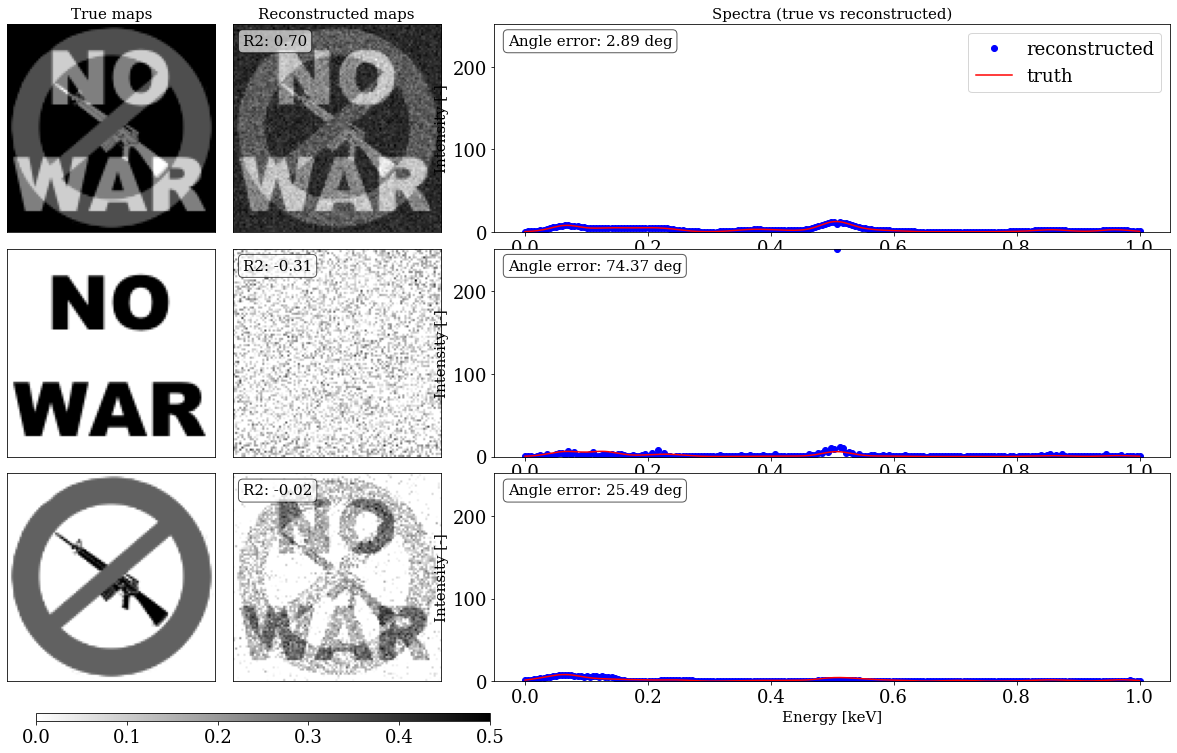

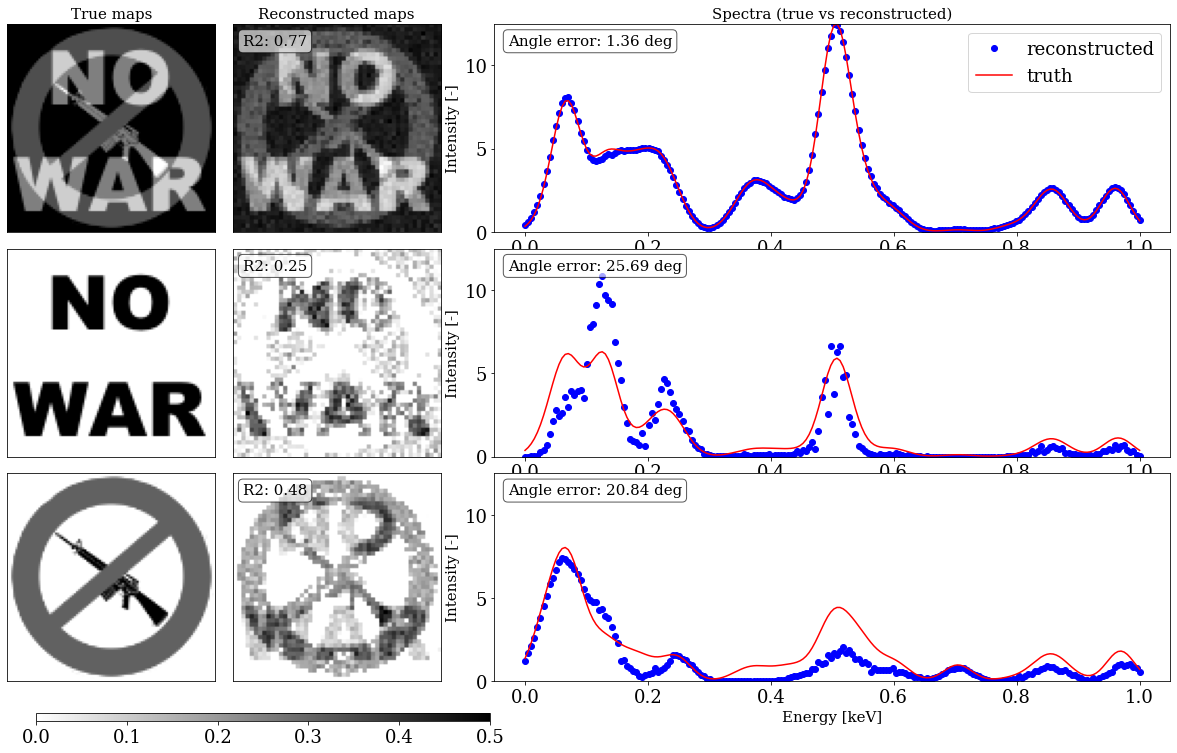

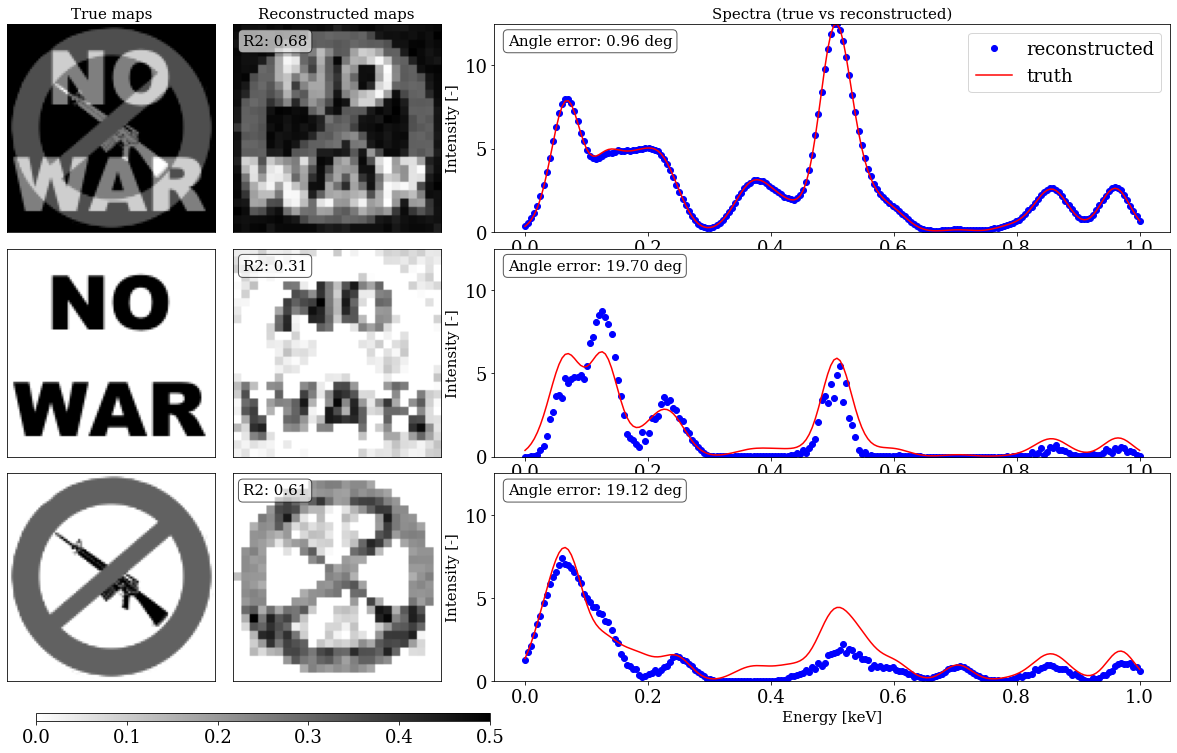

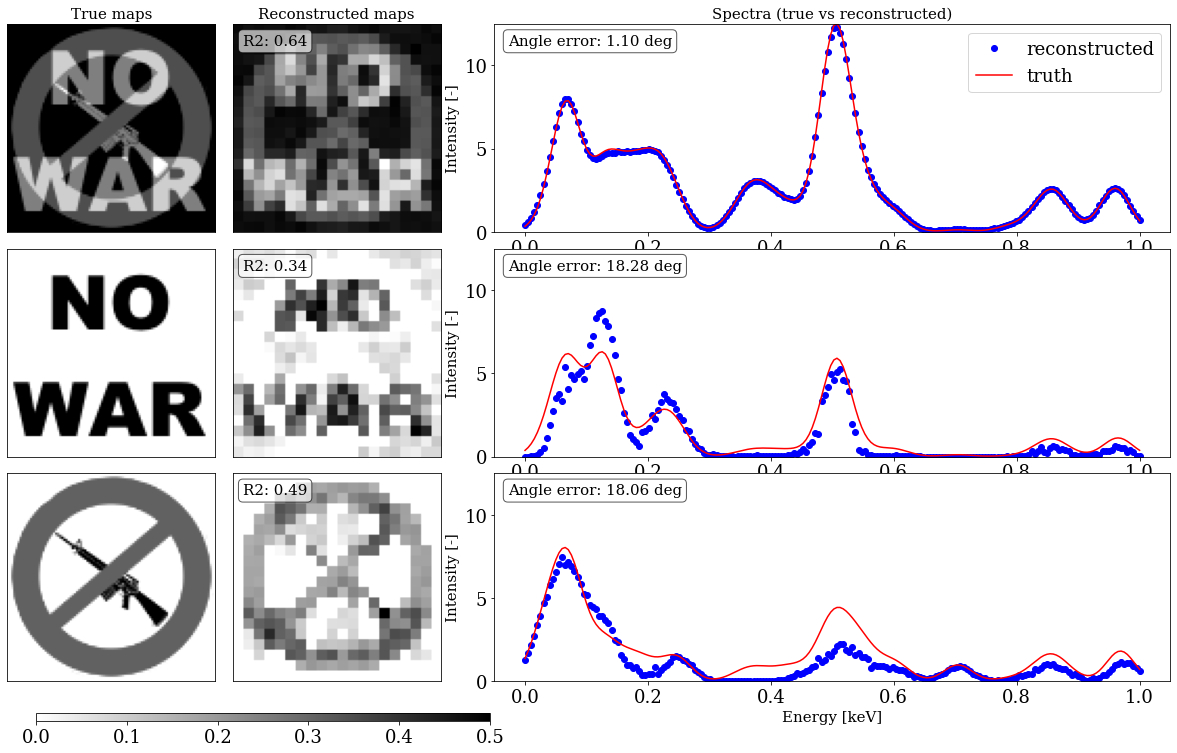

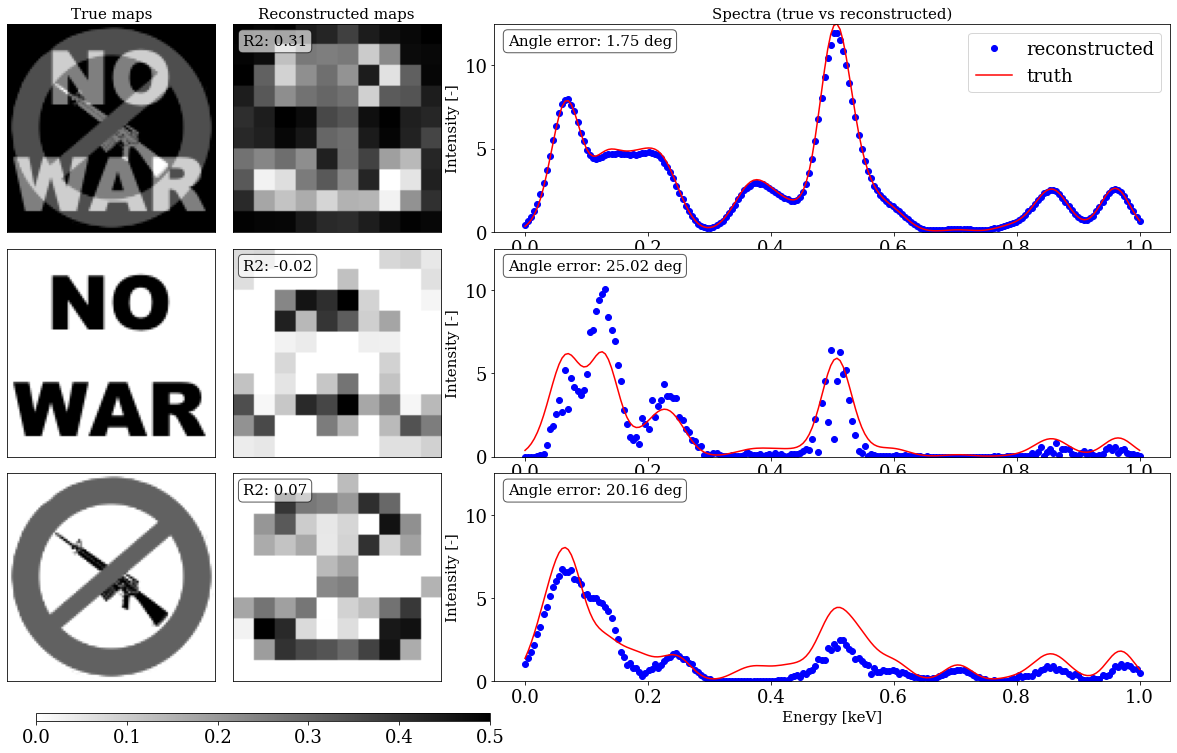

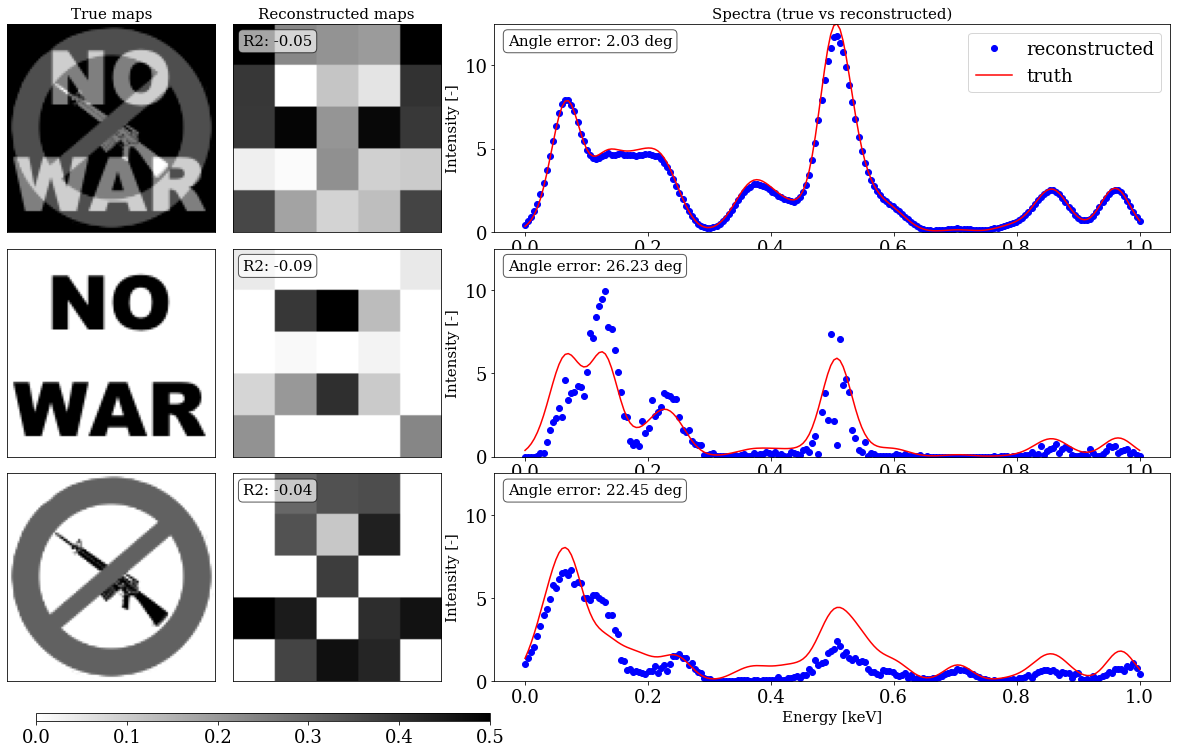

In [4]:
N_iterations = 100          # Set Number of iterations to 100 to obtain similar results as in report
resultsbinning = []         # To store results

binning_sizes = [(1,1,1),(1,2,2),(1,4,4),(1,5,5),(1,10,10),(1,20,20)]                                               # List of binning sizes to use to bin the dataset 
binning_factors = [binning_sizes[i][0]*binning_sizes[i][1]*binning_sizes[i][2] for i in range(len(binning_sizes))]  # Retrieve binning factors from binning sizes

for B_3D in binning_sizes:

    # Run NMF and save experiment results
    nmf_run = runNMF(Dtilde=Dtilde, Htilde=Htilde, lambda_=0,mu_=0, binning_sizes=[B_3D], alpha=-1, num_iterations=N_iterations, upsampleMode=0, Y_vol=Y_vol, Y_n_vol=None, G=None)

    # Store results
    resultsbinning.append(nmf_run)

resultsbinning = list(zip(*resultsbinning))
angles_binning, r2s_binning, times_binning, mses_binning, kls_binning = resultsbinning[0], resultsbinning[1], resultsbinning[2], resultsbinning[3], resultsbinning[4]


## Figure 8
Mean squared error and generalized Kullback-Leibler divergence as a function of B using
the ‘no war’ dataset. Note that Y˘ is upsampled on the spatial dimensions to match the dimensionality
of Y˜ .

/var/folders/dy/w1x934hd6fz67rjp2g6s1grc0000gn/T/ipykernel_94834/4091978293.py:8: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log', basex=2)


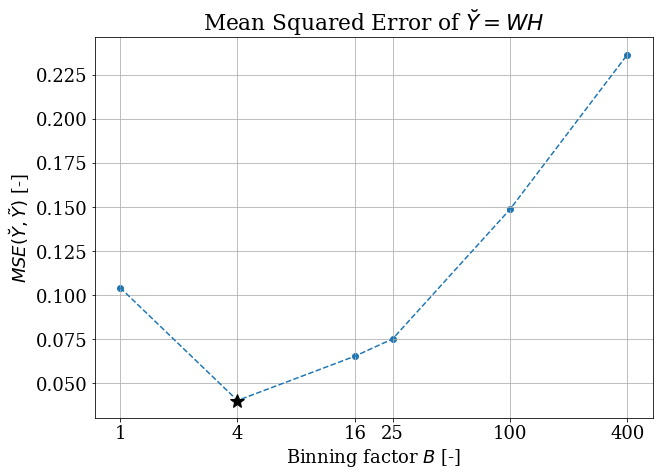

/var/folders/dy/w1x934hd6fz67rjp2g6s1grc0000gn/T/ipykernel_94834/4091978293.py:25: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log', basex=2)


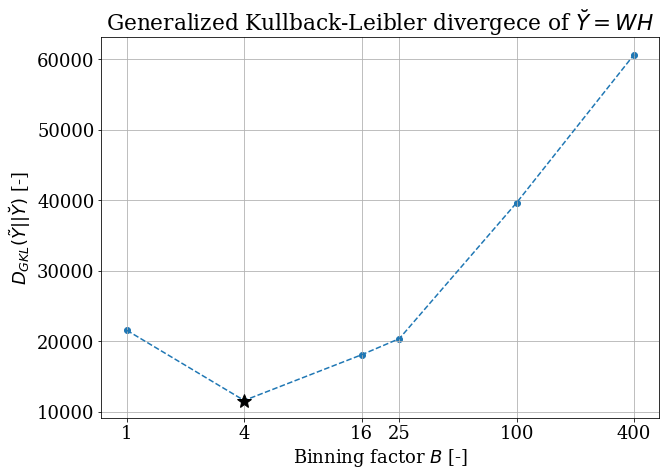

In [5]:
# Plot Figure 8.a
fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(binning_factors, mses_binning, linestyle='dashed')
ax1.scatter(binning_factors, mses_binning)
min_est  =np.argmin(mses_binning)
ax1.set_xlabel('Binning Factor $B$ [-]')
ax1.plot([binning_factors[min_est]], [mses_binning[min_est]] , 'k*', markersize=15)
ax1.set_xscale('log', basex=2)
ax1.set_xticks(binning_factors)
ax1.grid('on')
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_xaxis().get_major_formatter().labelOnlyBase = False
ax1.set_xlabel('Binning factor $B$ [-]')
ax1.set_ylabel(r'$MSE(\breve{Y}, \tilde{Y})$ [-]')
plt.title('Mean Squared Error of '+r'$\breve{Y} = WH$')
plt.show()

# Plot Figure 8.b
fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(binning_factors, kls_binning, linestyle='dashed')
ax1.scatter(binning_factors, kls_binning)
min_est  =np.argmin(kls_binning)
ax1.set_xlabel('Binning Factor $B$ [-]')
ax1.plot([binning_factors[min_est]], [kls_binning[min_est]], 'k*', markersize=15)
ax1.set_xscale('log', basex=2)
ax1.set_xticks(binning_factors)
ax1.grid('on')
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_xaxis().get_major_formatter().labelOnlyBase = False
ax1.set_xlabel('Binning factor $B$ [-]')
ax1.set_ylabel(r'$D_{GKL}(\tilde{Y} || \breve{Y})$ [-]')
plt.title('Generalized Kullback-Leibler divergece of '+r'$\breve{Y} = WH$')
plt.show()

# Figure 16
Coefficient of determination and angle error as a function of B using the ‘no war’
dataset. Note that H is upsampled on the spatial dimensions to match the dimensionality of H˜.

/var/folders/dy/w1x934hd6fz67rjp2g6s1grc0000gn/T/ipykernel_94834/1841802444.py:8: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log', basex=2)


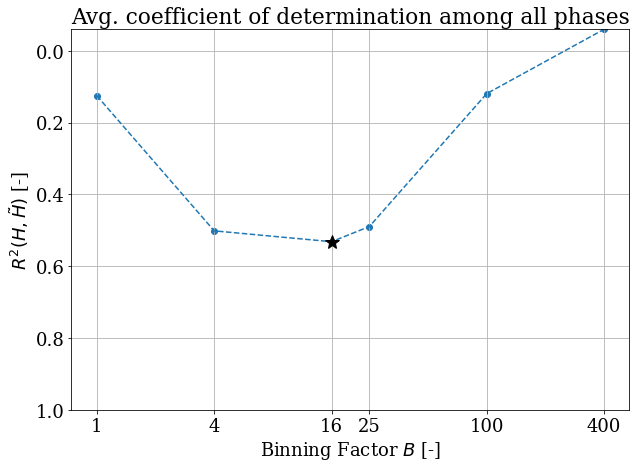

/var/folders/dy/w1x934hd6fz67rjp2g6s1grc0000gn/T/ipykernel_94834/1841802444.py:26: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log', basex=2)


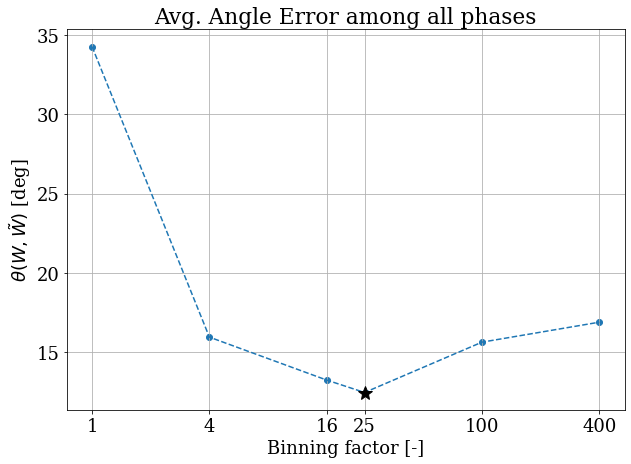

In [6]:
# Plot Figure 16.a
fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(binning_factors, r2s_binning, linestyle='dashed')
ax1.scatter(binning_factors, r2s_binning)
min_est  =np.argmax(r2s_binning)
ax1.set_xlabel('Binning Factor $B$ [-]')
ax1.plot([binning_factors[min_est]], [r2s_binning[min_est]], 'k*', markersize=15)
ax1.set_xscale('log', basex=2)
ax1.set_xticks(binning_factors)
ax1.grid('on')
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_xaxis().get_major_formatter().labelOnlyBase = False
ax1.set_xlabel('Binning Factor $B$ [-]')
ax1.set_ylabel(r'$R^2(H, \tilde{H})$ [-]')
ax1.set_ylim(1, np.min(r2s_binning))
plt.title('Avg. coefficient of determination among all phases')
plt.show()

# Plot Figure 16.b
fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(binning_factors, angles_binning, linestyle='dashed')
ax1.scatter(binning_factors, angles_binning)
min_est  =np.argmin(angles_binning)
ax1.set_xlabel('Binning Factor $B$ [-]')
ax1.plot([binning_factors[min_est]], [angles_binning[min_est]], 'k*', markersize=15)
ax1.set_xscale('log', basex=2)
ax1.set_xticks(binning_factors)
ax1.grid('on')
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_xaxis().get_major_formatter().labelOnlyBase = False
ax1.set_xlabel('Binning factor [-]')
ax1.set_ylabel(r'$\theta(W, \tilde{W})$ [deg]')
plt.title('Avg. Angle Error among all phases')
plt.show()

# Figure 15
Computation time of NMF(Bin(Yvol, B)) as a function of the binning factor B using the ‘no
war’ dataset

/var/folders/dy/w1x934hd6fz67rjp2g6s1grc0000gn/T/ipykernel_94834/2334069658.py:5: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log', basex=2)
/var/folders/dy/w1x934hd6fz67rjp2g6s1grc0000gn/T/ipykernel_94834/2334069658.py:6: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log', basey=2)


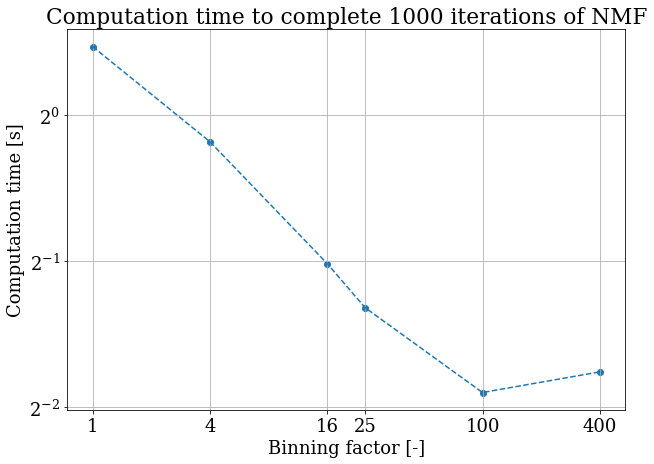

In [7]:
# Plot Figure 15
fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(binning_factors, times_binning, linestyle='dashed')
ax1.scatter(binning_factors, times_binning)
ax1.set_xscale('log', basex=2)
ax1.set_yscale('log', basey=2)
ax1.set_xticks(binning_factors)
ax1.grid('on')
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_xaxis().get_major_formatter().labelOnlyBase = False
ax1.set_xlabel('Binning factor [-]')
ax1.set_ylabel('Computation time [s]')
plt.title('Computation time to complete 1000 iterations of NMF')
plt.show()

## Figure 12
Average true and estimated MSE and M′ of the ‘no war’ dataset across all voxels as
a function of the binning factor B. Blue is used to denote the squared bias term, green is used to denote
the variance term, and red is used to denote the MSE and M′. Dashed lines represent
the estimated values, whereas the solid lines represent the true values.

/var/folders/dy/w1x934hd6fz67rjp2g6s1grc0000gn/T/ipykernel_94834/1378514730.py:22: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log', basex=2)


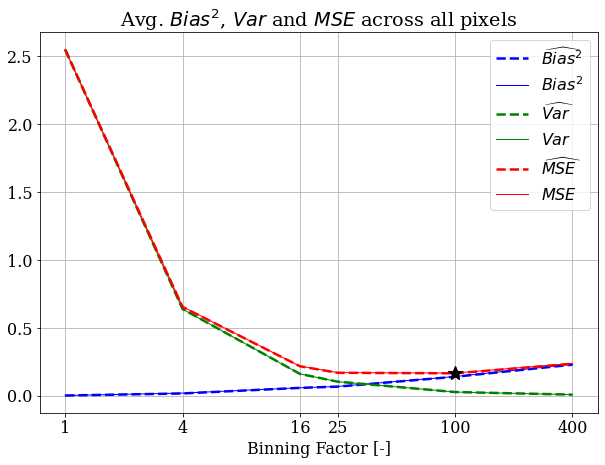

/var/folders/dy/w1x934hd6fz67rjp2g6s1grc0000gn/T/ipykernel_94834/1378514730.py:44: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log', basex=2)


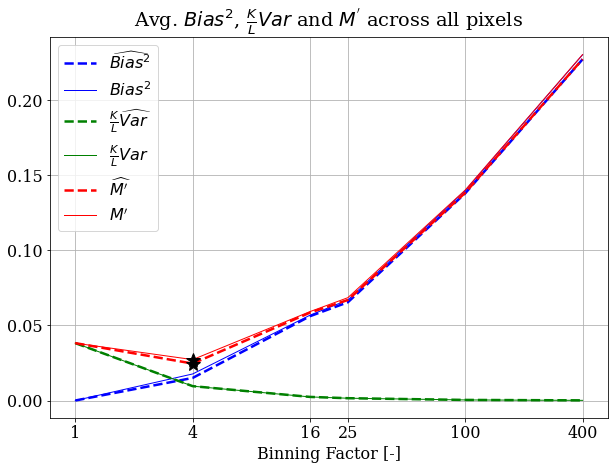

In [8]:
# Get estimators as a funciton of the binning factor
biases_est, biases, vars_est, vars, mses_est, mses, mprimes_est, mprimes = get_mse_and_mprime_vs_binningfactor(Ytilde.reshape(Y_vol.shape), Y_vol, binning_sizes, K)

plt.rcParams.update({'font.family':'serif'})
plt.rcParams.update({'font.size': 16})


# Figure 12.a
fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.plot([binning_factors[i] for i in range(len(binning_factors))], biases_est, 'b',linestyle='dashed', linewidth=2.5)
ax1.plot([binning_factors[i] for i in range(len(binning_factors))], biases, 'b', linewidth=1)
ax1.plot([binning_factors[i] for i in range(len(binning_factors))], vars_est,'g',linestyle='dashed', linewidth=2.5)
ax1.plot([binning_factors[i] for i in range(len(binning_factors))], vars,'g', linewidth=1)
ax1.plot([binning_factors[i] for i in range(len(binning_factors))], mses_est, 'r', linestyle='dashed', linewidth=2.5)
ax1.plot([binning_factors[i] for i in range(len(binning_factors))], mses, 'r', linewidth=1)
min_est  =np.argmin(mses_est)
min_gt = np.argmin(mses)
ax1.set_xlabel('Binning Factor [-]')
plt.legend(labels=[r'$\widehat{Bias}^2$',r'$Bias^2$', r'$\widehat{Var}$', '$Var$', r'$\widehat{MSE}$',  '$MSE$'])
ax1.plot([binning_factors[min_est]], [mses_est[min_est]], 'k*', markersize=15)
ax1.plot([binning_factors[min_gt]], [mses[min_est]], 'k*', markersize=15)
ax1.set_xscale('log', basex=2)
ax1.set_xticks(binning_factors)
ax1.grid('on')
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_xaxis().get_major_formatter().labelOnlyBase = False
plt.title('Avg. '+'$Bias^2$, '+ r'$Var$'+' and $MSE$'+' across all pixels')
plt.show()

# Figure 12.b
fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.plot([binning_factors[i] for i in range(len(binning_factors))], biases_est, 'b',linestyle='dashed', linewidth=2.5)
ax1.plot([binning_factors[i] for i in range(len(binning_factors))], biases, 'b', linewidth=1)
ax1.plot([binning_factors[i] for i in range(len(binning_factors))], vars_est*K/L,'g',linestyle='dashed', linewidth=2.5)
ax1.plot([binning_factors[i] for i in range(len(binning_factors))], vars*K/L,'g', linewidth=1)
ax1.plot([binning_factors[i] for i in range(len(binning_factors))], mprimes_est, 'r', linestyle='dashed', linewidth=2.5)
ax1.plot([binning_factors[i] for i in range(len(binning_factors))], mprimes, 'r', linewidth=1)
min_est  =np.argmin(mprimes_est)
min_gt = np.argmin(mprimes)
ax1.set_xlabel('Binning Factor [-]')
plt.legend(labels=[r'$\widehat{Bias}^2$',r'$Bias^2$', r'$\frac{K}{L}\widehat{Var}$', r'$\frac{K}{L}Var$', r'$\widehat{M^{\prime}}$',  r'$M^{\prime}$'])
ax1.plot([binning_factors[min_est]], [mprimes_est[min_est]], 'k*', markersize=15)
ax1.plot([binning_factors[min_gt]], [mprimes[min_est]], 'k*', markersize=15)
ax1.set_xscale('log', basex=2)
ax1.set_xticks(np.array(binning_factors))
ax1.grid('on')
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_xaxis().get_major_formatter().labelOnlyBase = False
plt.title('Avg. '+'$Bias^2$, '+ r'$\frac{K}{L}Var$'+' and $M^{\'}$'+' across all pixels')
plt.show()